# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Reading Titanic Dataset

In [2]:
titanic = pd.read_csv('Titanic-dataset.csv')

In [3]:
titanic.shape

(891, 12)

- 891 Records are present in dataset
- 12 Columns are present in dataset

### Exploratory Data Analysis

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Records : 891
- Features: 12
- Numerical features : PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
- Categorical features : Sex,Embarked
- Object features : Name,Ticket,Cabin
- MISSING VALUES : Missing values are present in Age, Embarked and Cabin columns

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Mean of suvived is 0.38 means only 38% of passengers survived the disaster
- Mean age of passenger is 29 and std is 14 indicating wide range of age for passengers
- Most of the passengers didn't have sibling or spouse indicated by median of Sibsp 
- Most of the passengers didn't have parents or children indicated by median of Parch
- Median fare is 14 and Max fare is 512 indicating there were passengers who travelled by paying high

### Checking for missing values

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are null values in dataset
- In Age column there are 177 null values
- In Cabin column there are 687 null values
- In Embarked column there are 2 null values

In [9]:
def null_pct(x):
    return (x.isnull().sum()/len(x))*100

In [10]:
x = titanic['Age']
y = titanic['Cabin']
z = titanic['Embarked']
print(f'Percent of null value in Age: {null_pct(x)} ')
print(f'Percent of null value in Cabin: {null_pct(y)} ')
print(f'Percent of null value in Embarked: {null_pct(z)} ')

Percent of null value in Age: 19.865319865319865 
Percent of null value in Cabin: 77.10437710437711 
Percent of null value in Embarked: 0.22446689113355783 


- Cabin has nearly 78% of  null values
- It will impact our model if we try to impute them by resulting in Overfit problems

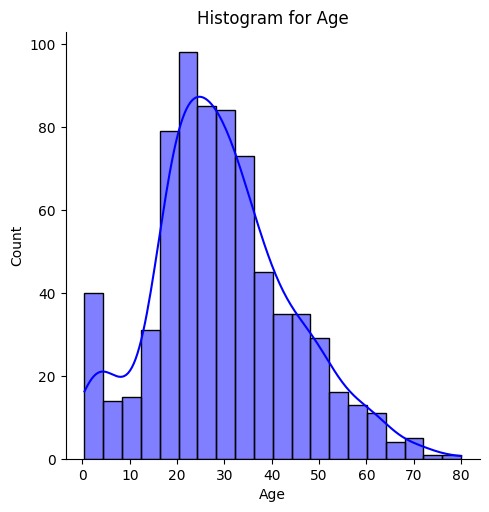

In [11]:
sns.displot(kde = True,x = 'Age',data = titanic,color = 'blue');
plt.title('Histogram for Age');

- Seems to be normally distributed

### Imputing null value

- There is no much difference between median and mean age
- It is better to use mean for now

In [12]:
titanic['Age'].median()

28.0

In [13]:
titanic['Age'].mean()

29.69911764705882

In [14]:
titanic['Age'].fillna(round(titanic['Age'].mean()),inplace = True)

In [15]:
titanic['Age'].isnull().sum()

0

- Dropping Cabin feature since it has large portion of values as NULL

In [16]:
titanic.drop('Cabin',axis = 1,inplace = True)

In [17]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Checking for duplicates

In [18]:
titanic.duplicated().sum()

0

- Dataset seems to have no duplicate Data
- Dropping of duplicate is not required 

### Checking for garbage values

- It is enough to check for garbage values only within object 
- Since garbage values convert datatype to object only

In [22]:
for i in titanic:
    if titanic[i].nunique() <10:
        print(i," : ",titanic[i].nunique())
        print(titanic[i].unique())

Survived  :  2
[0 1]
Pclass  :  3
[3 1 2]
Sex  :  2
['male' 'female']
SibSp  :  7
[1 0 3 4 2 5 8]
Parch  :  7
[0 1 2 5 3 4 6]
Embarked  :  3
['S' 'C' 'Q' nan]


- There seems to be  null values
- Dropping nan value in Embarked
- And we have to encode the Embarked Column

### Countplot for identifying ratio of survival between Male and Female

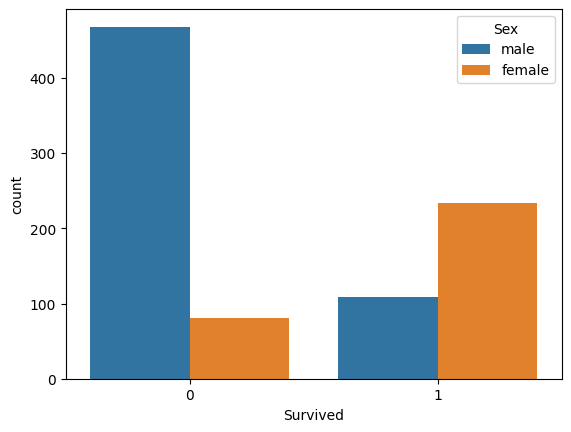

In [23]:
sns.countplot(x = 'Survived',data = titanic,hue = 'Sex');

In [24]:
pd.pivot_table(data=titanic,index='Survived',values='PassengerId',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


- 468 Male passengers Did not survive
- Female passengers Survived the most(233)

In [25]:
print(pd.DataFrame(titanic.groupby(['Survived'])['Fare'].mean()))

               Fare
Survived           
0         22.117887
1         48.395408


- Count of people who survived is 340 Class(0) and not surived is 549 Class(1).
- Passengers who travelled by paying high are surived most.

### Feature Selection

In [26]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

- Numerical features : PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
- Object features : Name,Ticket
- Categorical features : Sex,Embarked

### Encoding Categorical features

- OneHotEncoding the feature 'Sex'

In [27]:
Gender = pd.get_dummies(titanic['Sex'],drop_first = True);

- Dropping first category 
- It is sufficient with one encoded category

- OneHotEncoding the feature 'Embarked'

- Dropping Sex and Embarked features since Encoded and added to Dataframe
- Dropping Name,Ticket since they wont add value to our model

In [30]:
titanic1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,C,Q,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,Q,1,0,1,0
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.50,S,1,0,0,1
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.35,S,1,0,0,1
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.00,S,1,0,0,1
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.75,S,1,0,0,1


- Dropping Sex and Embarked features since Encoded and added to Dataframe
- Dropping Name,Ticket since they wont add value to our model

In [31]:
titanic1.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace = True)

In [32]:
titanic1.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
544,545,0,1,50.0,1,0,106.4250,1,1,0,0
414,415,1,3,44.0,0,0,7.9250,1,0,0,1
601,602,0,3,30.0,0,0,7.8958,1,0,0,1
304,305,0,3,30.0,0,0,8.0500,1,0,0,1
405,406,0,2,34.0,1,0,21.0000,1,0,0,1


### Plotting heatmap

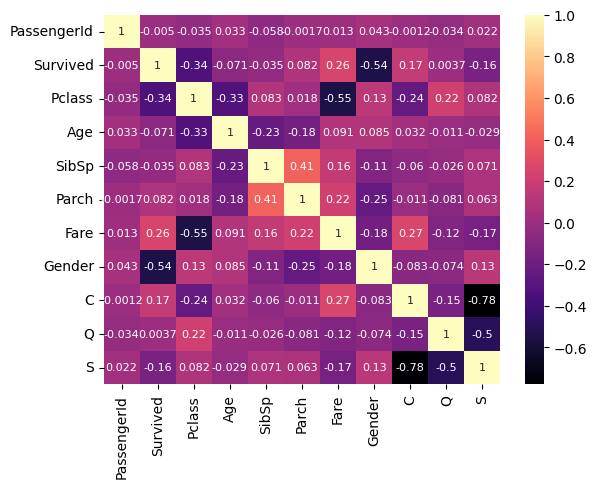

In [33]:
sns.heatmap(data = titanic1.corr(),annot = True,cmap = 'magma',annot_kws={'size':8});

- Prediction is our motive
- we could possibly avoid multicollinearity problem

### Splitting Dependent and Independent variable

In [34]:
X = titanic1.drop(['Survived','PassengerId','Parch'],axis = 1)
y = titanic1['Survived']

### Splitting Train test dataset

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30 ,random_state=900)

In [36]:
logreg = LogisticRegression()

In [37]:
X_train.dtypes

Pclass      int64
Age       float64
SibSp       int64
Fare      float64
Gender      uint8
C           uint8
Q           uint8
S           uint8
dtype: object

In [38]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [39]:
predict = logreg.predict(X_test)

In [40]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0], dtype=int64)

### Confusion matrix

In [105]:
pd.DataFrame(data = confusion_matrix(y_test,predict),index = ['Actual No','Actual Yes'],columns = ['Predicted No','Predicted yes'])

,Predicted No,Predicted yes
Actual No,148,12
Actual Yes,34,74


### Classification Report

In [106]:
print(f'Classification Report: \n\n {classification_report(y_test,predict)}')

Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.93      0.87       160
           1       0.86      0.69      0.76       108

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.81       268
weighted avg       0.83      0.83      0.82       268



- Recall for our model is significantly good
- We could rely on this model!

# Thank you